In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
w = 1936
h = 1176
header_size = 512

In [35]:
def equalize_histogram(img):
    [M, N]=img.shape
    # Calcul de la transformation
    T=1/(M*N)*np.cumsum(np.histogram(img, bins=2598, range=(0,2597))[0])
    img_eq=255*T[img]
    return img_eq

2507.5364 1910.2479 255.0 130.1699107142857


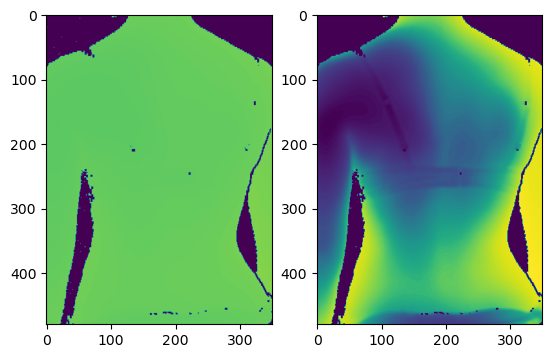

In [47]:
file_path = r'D:\StageE23\Data\Ete_2022\Participant06\autocorrection\Prise01\auto_01_007425_XYZ_39.raw'

with open(file_path, 'r') as f:
        f.seek(header_size)
        xyz = np.fromfile(f, np.float32).reshape((h,w,3))

z = xyz[:,:,2].T
z = z[-1:0:-1, :][800:1280, 450:800]

z_int = z.astype(np.uint32)
z_int[np.where(z < 1800)] = 0
z_eq = equalize_histogram(z_int)

print(np.max(z), np.median(z), np.max(z_eq), np.median(z_eq))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(z)
ax2.imshow(z_eq)
plt.show()